# Data Preprocessing

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data file

In [2]:
df=pd.read_csv('credit_data.csv')
df.head() # first 5 records

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.tail() # last 5 records

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


### Analysing the data

In [4]:
df.shape #rows & columns count

(1000, 11)

In [5]:
df.info() #datatype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
# dropping unnecessary variables - unnamed(first column)
df = df.drop(df.columns[0], axis=1) 

In [7]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [9]:
df.isnull().sum() #finding the missing data

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

_note:
The missing data can be handled in different ways:
1. Removing the particular rows (leads to loss of information)
2. Replace with most frequent values or mean value (preferred method)

In [10]:
df=df.fillna(df.mode().iloc[0])

In [11]:
df.isnull().sum() #checking for the missing data

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [12]:
df['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
df['Housing'].replace(['own', 'free','rent'],[0, 1,2], inplace=True)
df['Checking account'].replace(['little', 'moderate', 'rich'],[0, 1, 2], inplace=True)
df['Saving accounts'].replace(['little', 'quite rich', 'rich', 'moderate'],[0, 1, 2, 3], inplace=True)
df['Purpose'].replace(['radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'],[0, 1, 2,3, 4, 5, 6, 7], inplace=True)
df['Risk'].replace(['good', 'bad'],[0, 1], inplace=True)

In [13]:
df.info() #datatype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


### Correlation of the data

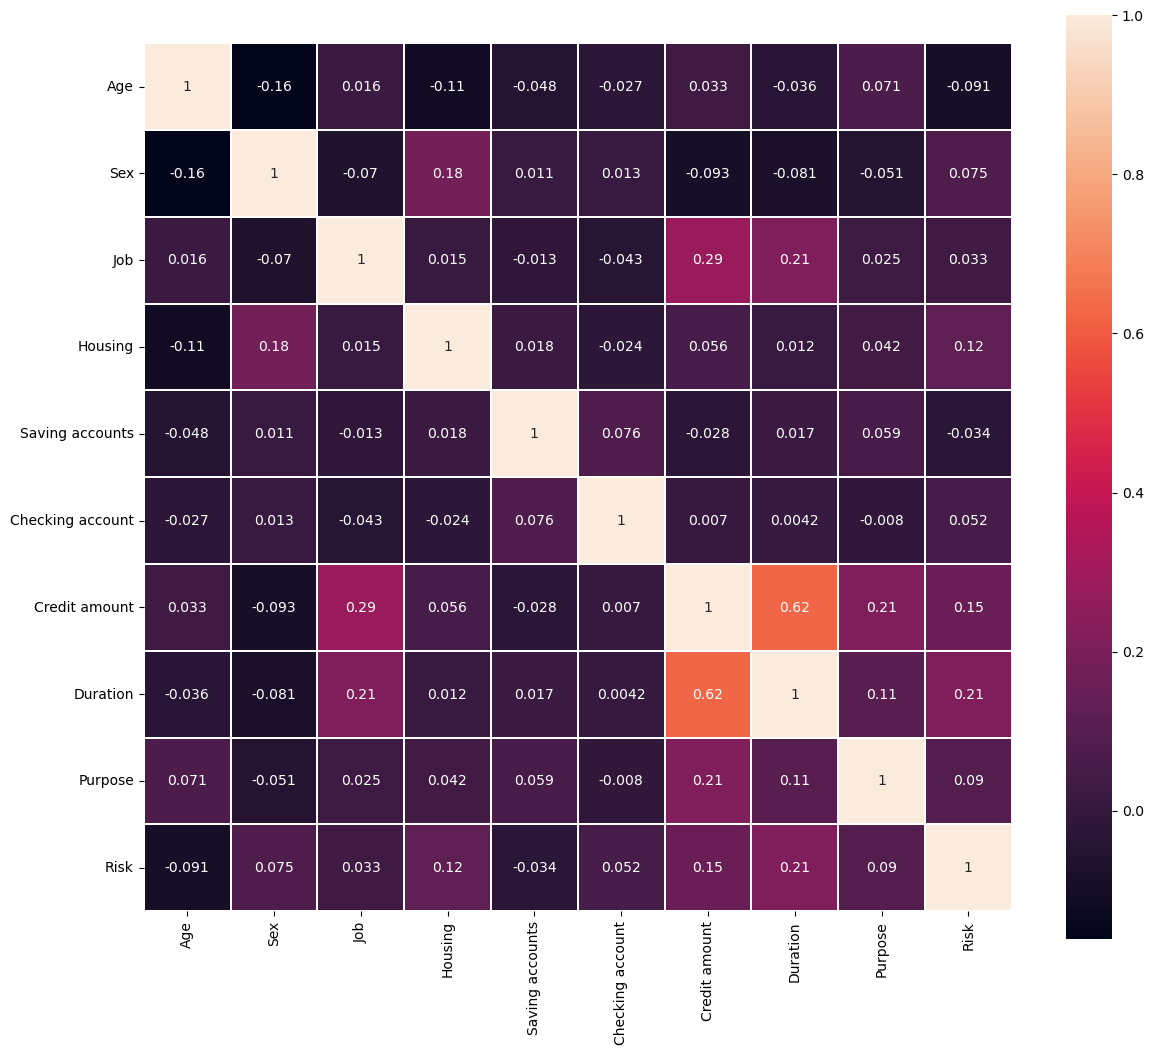

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### Handling the data with ML algorithms

In [22]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Splitting independent & dependent variables

In [23]:
X=df.iloc[:,:-1].values # taking all rows , all columns except last column as independent variables
y=df.iloc[:,-1] # taking all rows, last column as dependent variable

In [24]:
#splitting training & testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) 

In [25]:
#initialising all necessary models for classification 
svc=SVC()
mlp=MLPClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=GaussianNB()

In [26]:
#using k-fold for evaluating the model accuracy
models=[svc,mlp,dt,rf,knn,nb];
for model in models:
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)
    print(model, ": %.2f" % scores.mean())

SVC() : 0.70
MLPClassifier() : 0.63
DecisionTreeClassifier() : 0.61
RandomForestClassifier() : 0.72
KNeighborsClassifier() : 0.67
GaussianNB() : 0.69


/Users/vigneshkannaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vigneshkannaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

#### Models with good results are random forest & support vector classification
##### Parameter tuning using GridSearchCV for the best models to make the prediction more generalizable

In [27]:
def gridSearchFunction(model,params,cv,X_train,y_train):
    gs = GridSearchCV(model, param_grid=params, cv=cv)
    gs.fit(X_train, y_train)
    print("accuracy: %.2f" % gs.best_score_)
    print("best params:" , gs.best_params_)
    
#this function predicts the dependent value based on training
def model_predict(classifier,X_train,y_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = classifier.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return y_pred

#This function will display the full results (confusion matrix, classification report)
def display_result(modelName,classifier,X_train,y_train,X_test,y_test):
    print(modelName + ' results')
    y_pred = model_predict(classifier,X_train,y_train,X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=classifier.classes_).plot()
    plt.show()
    print(classification_report(y_test, y_pred))
    print('\n')
    print("f1 score: %.2f" % f1_score(y_test,y_pred,average='macro'))
    print("accuracy: %.2f" % accuracy_score(y_test,y_pred))

### SVC

SVC results


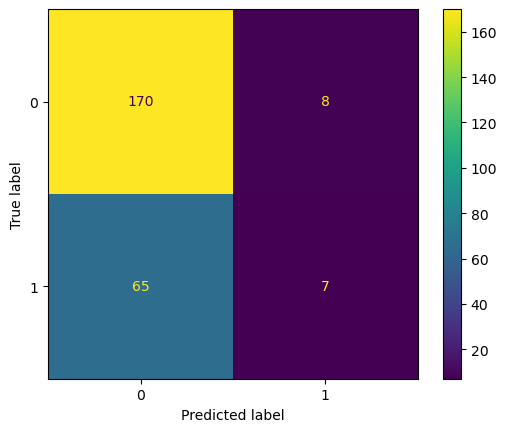

              precision    recall  f1-score   support

           0       0.72      0.96      0.82       178
           1       0.47      0.10      0.16        72

    accuracy                           0.71       250
   macro avg       0.60      0.53      0.49       250
weighted avg       0.65      0.71      0.63       250



f1 score: 0.49
accuracy: 0.71


In [28]:
model=SVC(gamma='auto')
display_result('SVC',model,X_train,y_train,X_test,y_test)

## Random forest

In [29]:
param_grid = {"max_depth": [5,10,None],
              "n_estimators":[50,100,200]}
model = RandomForestClassifier(random_state=0)
gridSearchFunction(model,param_grid,5,X_train,y_train)

accuracy: 0.71
best params: {'max_depth': None, 'n_estimators': 50}


RandomForest results


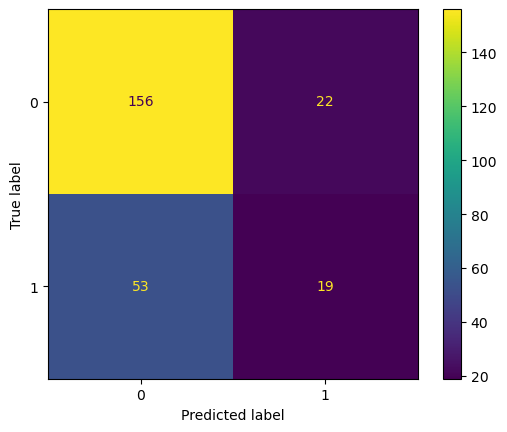

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       178
           1       0.46      0.26      0.34        72

    accuracy                           0.70       250
   macro avg       0.60      0.57      0.57       250
weighted avg       0.66      0.70      0.67       250



f1 score: 0.57
accuracy: 0.70


In [30]:
#using the efficient params for random forest
model=RandomForestClassifier(random_state=0,max_depth=None,n_estimators=50)
display_result('RandomForest',model,X_train,y_train,X_test,y_test)

##### the results got better for Random forest model